# Time series analysis

In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from collections import OrderedDict
#%matplotlib notebook

In [2]:
#setup
df = pd.read_csv("consumption.csv")

In [3]:
# Setting an index for df
df = df.set_index("meter_id")

In [4]:
df_T = df.T
df_T.index = pd.to_datetime(df_T.index)

#resampling the data into daily usage:
df_T_daily = df_T.resample('D').mean()
#df_daily = df_T_daily.T

In [5]:
#resampling the data into weekly usage:
df_T_weekly = df_T.resample('W').mean()

In [6]:
#resampling the data into montly usage:
df_T_monthly = df_T.resample('M').mean()

In [7]:
#resampling the data into montly usage:
df_T_hourly = df_T.resample('H').mean()
df_T_half_hourly=df_T.resample('30Min').mean()

<AxesSubplot:>

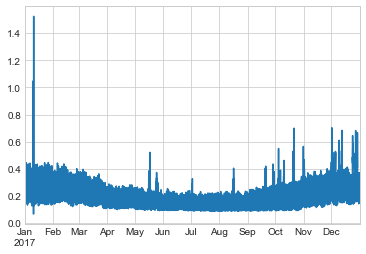

In [8]:
df_T.mean(axis=1).plot() #This plot look a lot like the one in our first notebook

<AxesSubplot:>

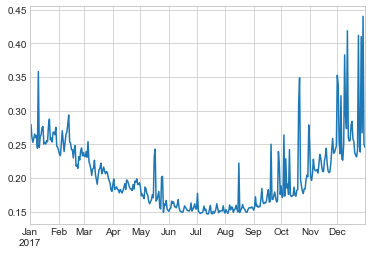

In [9]:
df_T_daily.mean(axis=1).plot()

<AxesSubplot:>

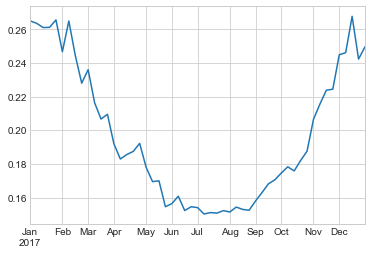

In [10]:
df_T_weekly.mean(axis=1).plot()

<AxesSubplot:>

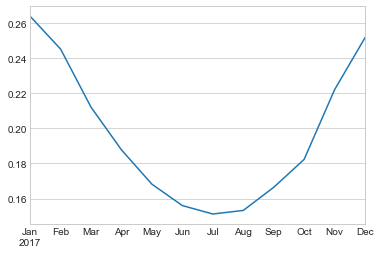

In [11]:
df_T_monthly.mean(axis=1).plot()

<AxesSubplot:>

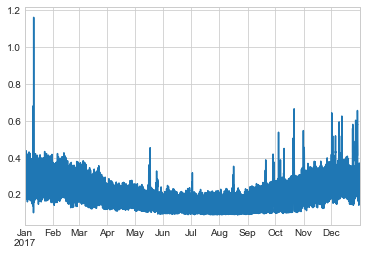

In [12]:
df_T_hourly.mean(axis=1).plot()

<AxesSubplot:>

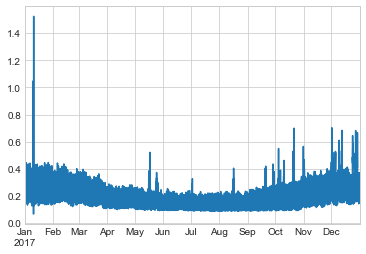

In [13]:
df_T_half_hourly.mean(axis=1).plot()

In [14]:
print(df_T.shape)
print(df_T_daily.shape)
print(df_T_weekly.shape)
print(df_T_monthly.shape)
print(df_T_hourly.shape)
print(df_T_half_hourly.shape)

(17520, 3248)
(365, 3248)
(53, 3248)
(12, 3248)
(8760, 3248)
(17520, 3248)


### Weekly pattern

<AxesSubplot:>

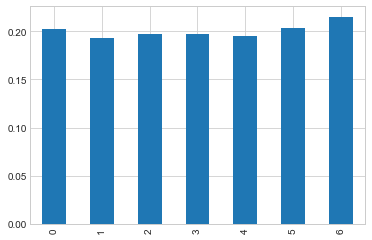

In [15]:
df_T_daily.groupby(df_T_daily.index.weekday).mean().mean(axis=1).plot(kind='bar')

### Monthly pattern

<AxesSubplot:>

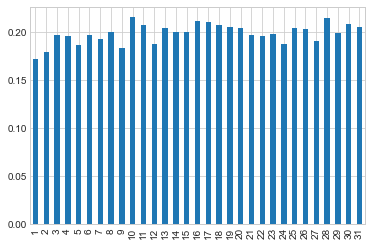

In [16]:
df_T_daily.groupby(df_T_daily.index.day).mean().mean(axis=1).plot(kind='bar')

### Hourly pattern

In [37]:
df_T_hourly = df_T.resample('H').sum()
df_T_hourly.tail()

meter_id,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,0x263b7a6969c175823ea1fba2983668fa5f640ab4,0xc8ef570cfdbc48c0555ba48ccb350403cf43cd79,0x077eb7207315025bfd8dd65f5b81f8be612b3229,0xaf8627889fff7ba6fa91bfae6b05636453d032f1,0x3b7466451863d09c34673c4dfe45391d56e0cb23,...,0x5338e0440f7dbcc50f20487fd7a3a675b7508112,0xaec5c63f4e44e21559b0404488ef3ba9884b2745,0xdf6a54b92985398af03423426e744c6d40ee8c69,0x6b6ddc9a73405caab50c8d5575b72288aaa7e844,0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0xfdaf9f857621ec06f2cf801f42a020a322835090,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0x47218b46abb2fcaade487a211911406dc6e13730,0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd
2017-12-31 19:00:00,0.143,1.041,0.233,0.214,0.032,1.157,0.028,0.205,0.318,0.150,...,0.893,0.247,0.798,0.426,0.614,0.376,0.031,0.313,0.349,0.364
2017-12-31 20:00:00,0.165,1.371,0.046,0.176,0.042,1.152,0.036,0.957,0.399,0.276,...,0.748,0.241,0.852,0.411,0.519,0.361,0.048,0.345,0.345,0.381
2017-12-31 21:00:00,0.164,1.262,0.033,0.075,0.038,1.083,0.037,0.608,0.279,0.307,...,0.782,0.298,1.574,2.289,0.475,0.383,0.019,0.297,0.352,0.370
2017-12-31 22:00:00,0.168,0.150,0.045,0.056,0.034,0.046,0.037,0.377,0.237,0.191,...,1.133,0.448,0.826,2.049,0.419,0.362,0.041,0.335,0.367,0.406
2017-12-31 23:00:00,0.091,0.097,0.039,0.054,0.049,0.043,0.032,0.339,0.203,0.138,...,1.233,0.299,0.624,0.613,0.348,0.375,0.028,0.224,0.578,0.376


Text(0, 0.5, 'Hourly consumption (kWh)')

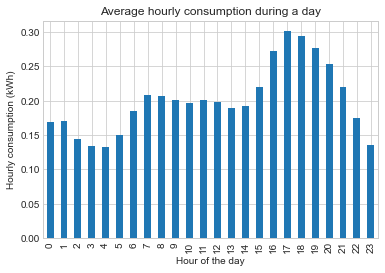

In [36]:
df_T_hourly.groupby(df_T_hourly.index.hour).mean().mean(axis=1).plot(kind='bar')
plt.title('Average hourly consumption during a day')
plt.xlabel('Hour of the day')
plt.ylabel('Hourly consumption (kWh)')

Text(0, 0.5, 'Hourly consumption (kWh)')

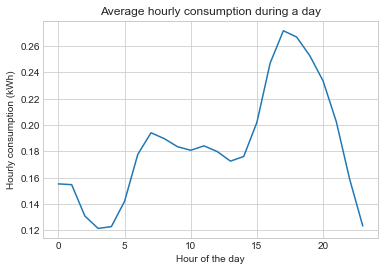

In [38]:
df_T_hourly.groupby(df_T_hourly.index.hour).mean().mean(axis=1).plot()
plt.title('Average hourly consumption during a day')
plt.xlabel('Hour of the day')
plt.ylabel('Hourly consumption (kWh)')

strangly the values at 23 and 0 seems quite far apart. Maybe it just looks like this since they're not next to each other in ther curve

### Decomposition

d:\programmas\anaconda\envs\forecastingenergyconsumption\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
d:\programmas\anaconda\envs\forecastingenergyconsumption\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


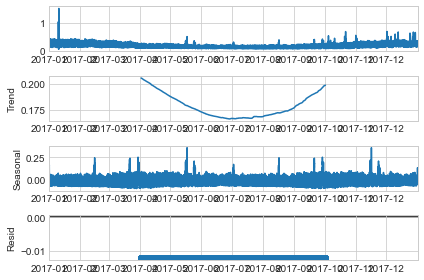

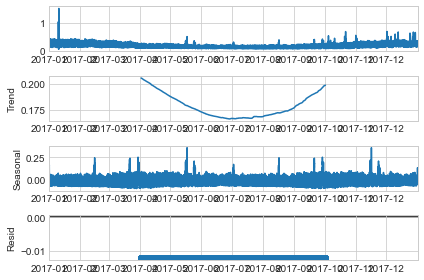

In [18]:
# Decompose the time series with a yearly seasonality
stl = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='additive', freq=24*365)

_ = stl.plot()

stls = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='multiplicative', freq=24*365)

_ = stl.plot()

We're able to extract some seasonality but it is clear that the trend we find is actually a yearly seasonanlity. The residue is more or less constant.

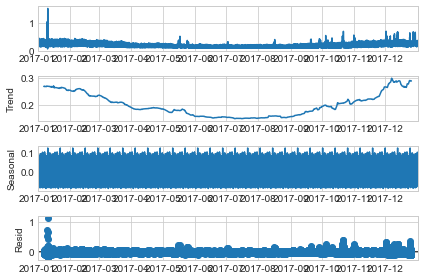

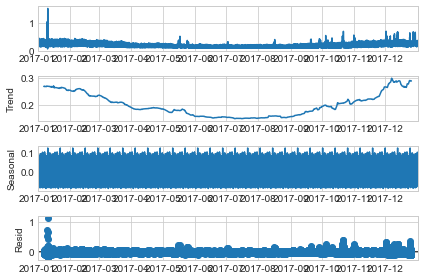

In [19]:
# Decompose the time series with a yearly seasonality
stl = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='additive', period=2*24*12) #montly seonality

_ = stl.plot()

stls = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='multiplicative', period=2*24*12)

_ = stl.plot()

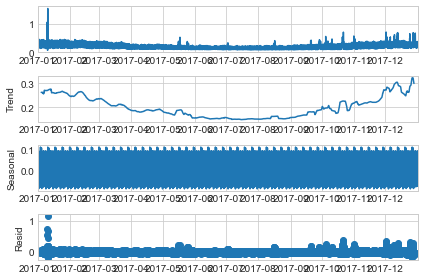

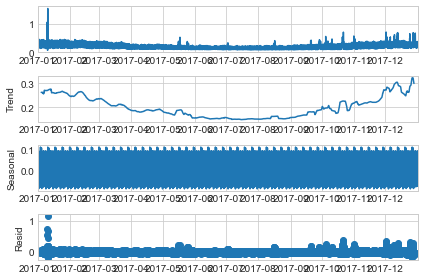

In [20]:
# Decompose the time series with a yearly seasonality
stl = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='additive', period=2*24*7) #weekly seonality

_ = stl.plot()

stls = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='multiplicative', period=2*24*7)

_ = stl.plot()

In [21]:
#TO MEMORY INTENSIVE I'M NOT SURE IF THIS ACTUALLY WORKS
#df_half_hourly=df_T_half_hourly.mean(axis=1)
# Allocate structures to save the deseasonalized data, and the cumulated seasonality:
#df_deseasonalized = df_half_hourly.copy()
#freqs = OrderedDict()
#freqs['weekly'] = 2*24*7
#freqs['monthly'] = 2*24*12
#"seasonality = {}
# df_seasonal_total = pd.DataFrame(0,
#                                        index   = df_deseasonalized.index,
#                                        columns = ["consumption"])

# trend = pd.DataFrame(0, index   = df_deseasonalized.index,columns = ["consumption"])
# residuals = pd.DataFrame(0, index   = df_deseasonalized.index,columns = ["consumption"])
    
# # For every variable in our time series
# seasonality["consumption"] = pd.DataFrame(index=df_deseasonalized.index, columns = freqs.keys())
# trend      ["consumption"] = pd.DataFrame(index=df_deseasonalized.index, columns = freqs.keys())
    
# # For every frequency
# for season, freq in freqs.items():
#     # Compute and plot the seasonality 
#     stl = seasonal_decompose(df_deseasonalized, model='additive', freq=freq, extrapolate_trend='freq')        
#     seasonality[season] = stl.seasonal
        
#     # Cumulate results
#     df_deseasonalized = df_deseasonalized - stl.seasonal
#     df_seasonal_total = df_seasonal_total + stl.seasonal
#     trend             = stl.trend
#     residuals       = stl.resid

# # Gather everything into a single DataFrame for direction_centre
# df_comb = pd.DataFrame({'original'          : df_half_hourly,
#                                     'seasonality_weekly': seasonality['weekly'],
#                                     'seasonality_yearly': seasonality['yearly'],
#                                     'seasonality_total' : df_seasonal_total['direction_centre'],
#                                     'trend'             : trend['direction_centre'],
#                                     'residuals'         : residuals['direction_centre'],
#                                     'deseasonalized'    : df_deseasonalized['direction_centre']},
#                                    index = df_half_hourly.index)

### auto correlation

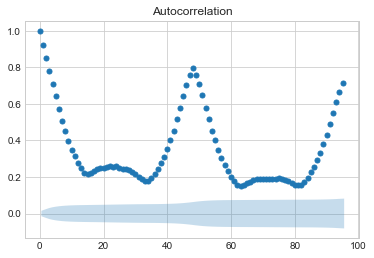

In [22]:
_= tsaplots.plot_acf(df_T_half_hourly.mean(axis=1), lags = np.arange(24*2*2),  use_vlines=False) #auto correlation 2 days

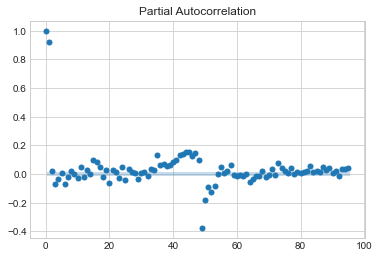

In [23]:
_= tsaplots.plot_pacf(df_T_half_hourly.mean(axis=1), lags = np.arange(24*2*2), use_vlines=False)

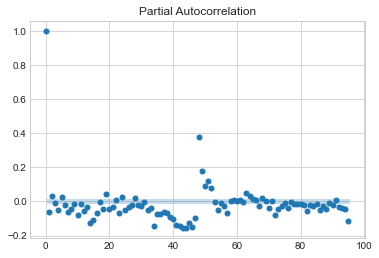

In [24]:
_= tsaplots.plot_pacf(df_T_half_hourly.mean(axis=1).diff()[1:], lags = np.arange(24*2*2),use_vlines=False)

<AxesSubplot:>

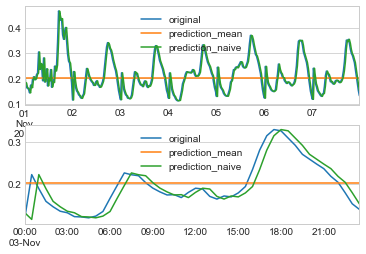

In [25]:
# Fit the basic predictors
df_direction_centre = pd.DataFrame()
df_direction_centre['original'] = df_T_half_hourly.mean(axis=1)
df_direction_centre['prediction_mean']  = df_T_half_hourly.mean(axis=1).mean()
df_direction_centre['prediction_naive'] = df_T_half_hourly.mean(axis=1).shift(1)

fig, ax = plt.subplots(2,1)
to_plot = ['original','prediction_mean','prediction_naive']
df_direction_centre[to_plot]['2017-11-01':'2017-11-07'].plot(ax=ax[0])
df_direction_centre[to_plot]['2017-11-03'].plot(ax=ax[1])

We could try to see how good an arima prediction is on each user and calculate the MSE for this but i'm not sure if it's worth doing all this effort.